### Analysing my own runs

#### Importing libraries

In [146]:
import pandas as pd
import seaborn as sn
import numpy as np
import polars as pl
from datetime import timedelta



### Reading the data

- Get rid of unnecesary columns
- Wrangle columns and put in adequate types



In [170]:
# read the data
data_runs = pd.read_csv("C:\\Users\\JuanCarlosSaraviaDra\\Dropbox\\Garmin\\Activities_07082024.csv")

# Extract only the columns that will be used
data_runs = data_runs[['Activity Type', 'Date', 'Distance', 'Calories', 'Time', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace', 'Best Pace', 'Total Ascent', 'Total Descent', 'Avg Stride Length', 'Number of Laps', 'Moving Time', 'Elapsed Time',  'Min Elevation', 'Max Elevation']]

# Filter only the usefull activities
data_runs = data_runs[data_runs['Activity Type'].str.contains("Running", na = False)]
data_runs = data_runs[~data_runs['Activity Type'].str.contains("Indoor Running", na = False)]

# Get rid of the dashes
data_runs.replace('--', np.nan, inplace=True)

# Change values into right format in this case numeric
columns = ['Distance','Calories', 'Avg HR', 'Max HR', 'Avg Run Cadence', 'Max Run Cadence', 'Total Ascent','Total Descent', 'Avg Stride Length', 'Number of Laps', 'Min Elevation', 'Max Elevation']

# Change to numeric           
data_runs[columns] = data_runs[columns].apply(pd.to_numeric, errors='coerce', axis = 1)

columns_date_time = ['Date', 'Time', 'Moving Time', 'Elapsed Time']

# Change to datetime

data_runs[columns_date_time] = data_runs[columns_date_time].apply(pd.to_datetime, format = 'mixed',
                                                                  errors='coerce', axis = 1)

#data_runs['Date'] = pd.to_datetime(data_runs['Date'], format ='mixed')
#data_runs['Time'] = pd.to_datetime(data_runs['Time'],format= 'mixed' )



#data_runs['Moving Time'] = pd.to_datetime(data_runs['Moving Time'], format ='mixed')
#data_runs['Elapsed Time'] = pd.to_datetime(data_runs['Elapsed Time'], format ='mixed')

# Change type Pace
columns_Pace = ['Avg Pace', 'Best Pace']

data_runs[columns_Pace] = data_runs[columns_Pace].apply(pd.to_datetime, format = '%M:%S', errors = 'coerce',
                                                        axis = 1) 


In [ ]:
data_runs


<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 0 to 531
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Activity Type      469 non-null    object        
 1   Date               469 non-null    datetime64[ns]
 2   Distance           469 non-null    float64       
 3   Calories           463 non-null    float64       
 4   Time               469 non-null    datetime64[ns]
 5   Avg HR             466 non-null    float64       
 6   Max HR             466 non-null    float64       
 7   Avg Run Cadence    467 non-null    float64       
 8   Max Run Cadence    466 non-null    float64       
 9   Avg Pace           469 non-null    datetime64[ns]
 10  Best Pace          469 non-null    datetime64[ns]
 11  Total Ascent       457 non-null    float64       
 12  Total Descent      467 non-null    float64       
 13  Avg Stride Length  467 non-null    float64       
 14  Number of Laps 

In [ ]:
data_runs['Avg Run Cadence'] = pd.to_numeric(data_runs['Avg Run Cadence'])
data_runs = data_runs[data_runs['Avg HR'] > 100] 

ax = sn.scatterplot(x="Avg Run Cadence",
                    y="Avg HR",
                    data=data_runs)
ax.tick_params(axis='x', labelrotation=90)

<Axes: xlabel='Avg Stride Length', ylabel='Avg HR'>

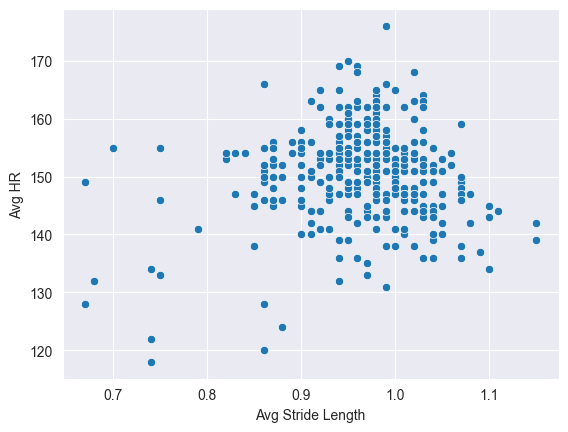

In [9]:
sn.scatterplot(x="Avg Stride Length",
                    y="Avg HR",
                    data=data_runs)

In [12]:

data_runs = data_runs[data_runs['Avg HR'] > 100] 

ax2 = sn.scatterplot(x="Avg Pace",
                    y="Avg HR",
                    data=data_runs)
ax2.tick_params(axis='x', labelrotation=90)

UFuncTypeError: Cannot cast ufunc 'equal' input 0 from dtype('<m8[ns]') to dtype('<m8') with casting rule 'same_kind'